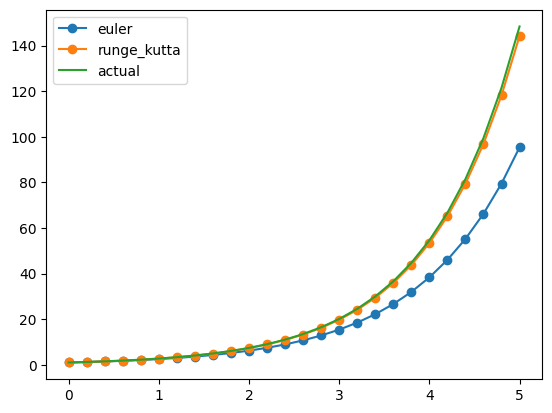

In [ ]:
from simpleeval import simple_eval
from functools import reduce
import math
import matplotlib.pyplot as plt

# the differential equation takes its arguments as an array
# so that we can handle higher orders;
# x, y, y', y'', etc come in that order in the array
# This is the equation for Ce^x
def diff_equation(args):
    t = args [0]
    y = args[1]
    return y

# takes an equation, a method, a set of initial values
# the step value, and the duration, then runs that method
# against the equation at that step value until the duration is reached.
def generate_points(f, method, init, step, duration):
    start = [*init, f(init)]  
    return reduce(
        lambda prev, s: prev + [method(f, prev[-1], s)], 
        (step for _ in range(int(duration / step))), 
        [start]
    )
    # In Haskell it would be    
    # iter = replicate (floor (duration / step)) step
    # foldl ((prev, s -> method f prev s) start iter

    # To do the same thing imperitavely:
    # result = [start]
    # for i in range(int(duration / step)):
    #     result = result + [method(f, result[-1], step)]
    # return result

# Increment each order by its order+1 from the previous step
# Except for the highest order which uses f(x, y,...)
def eulers_method(f, prev, step):
    start = [prev[0] + step] + list(map(
        lambda i: prev[i] + step*prev[i + 1],
        range(1, len(prev) - 1)
    ))
    return start + [f(start)]

# Do the same thing as before, but calculate for the midpoint first
# and use that instead of just using the values from the previous iteration.
def second_order_runge_kutta(f, prev, step):
    half_euler = eulers_method(f, prev, step/2)
    start = [prev[0] + step] + list(map(
        lambda i: prev[i] + step*half_euler[i + 1],
        range(1, len(prev) - 1)
    ))
    return start + [f(start)]

# compare euler with runge kutta and optionally, the actual equation
def compare(dif, init, step, duration, eq=None):
    e_points = generate_points(dif, eulers_method, init, step, duration)
    x_e = list(map(lambda p: p[0], e_points))
    y_e = list(map(lambda p: p[1], e_points))
    plt.plot(x_e, y_e, '-o', label="euler")
    r_points = generate_points(dif, second_order_runge_kutta, init, step, duration)
    x_r = list(map(lambda p: p[0], r_points))
    y_r = list(map(lambda p: p[1], r_points))
    plt.plot(x_r, y_r, '-o', label="runge_kutta")
    if eq is not None:
        x_p = list((step*x for x in range(int(duration / step) + 1)))
        y_p = list(map(eq, x_p))
        plt.plot(x_p, y_p, label="actual")
    
    plt.legend()
    plt.show()

compare(diff_equation, [0, 1], 0.2, 5, eq=lambda x: math.e ** x,)

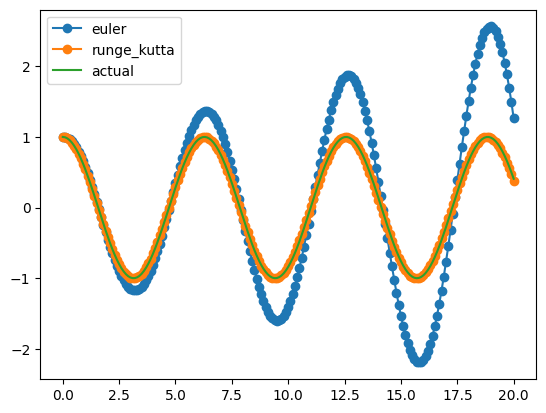

In [ ]:
#Simple differential equation for cosine is
# y'' = -y
def cos_diff(args):
    return -1*args[1]

compare(cos_diff, [0, 1, 0], 0.1, 20, eq=math.cos)